# Lab 1 - Basic ML algorithms
## (Linear and Logical regression)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from jupyterplot import ProgressPlot
from random import shuffle

---

## Linear regression

In [2]:
# X
samplepool_size = 10**3
val_min, val_max = -10, 10
X = np.random.uniform(val_min, val_max, samplepool_size)

# Noise
N = np.random.normal(size = samplepool_size, scale = 100) # scale?

# Y = aX + b + N
a, b = 69, 404
Y = a*X + b + N

In [3]:
# Initial settings
a_pred, b_pred = 0, 0
lr = 0.01
batch_size = 32

# Algorithm
for epoch in range(1000):
    for step in range(0, samplepool_size, batch_size):
        da = (-(Y[step:(step+batch_size)] - a_pred*X[step:(step+batch_size)] - b_pred)*X[step:(step+batch_size)]).mean()
        a_pred -= lr*da
        
        db = -(Y[step:(step+batch_size)] - a_pred*X[step:(step+batch_size)] - b_pred).mean()
        b_pred -= lr*db
    
    # Learning rate adjustments
    if epoch % 100 == 0 and epoch != 0:
        lr /= 10

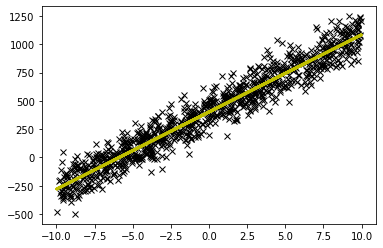

a=69.00, a_pred=68.24
b=404.00, b_pred=401.94


In [4]:
# Displaying data
plt.plot(X, Y, 'xk')

# Predicted line
# G = np.arange(0, 10**3)
Y_pred = a_pred*X + b_pred
plt.plot(X, Y_pred, 'y', lw=3)
plt.show()

print(f"a={a:.2f}, a_pred={a_pred:.2f}")
print(f"b={b:.2f}, b_pred={b_pred:.2f}")

---

## Logistical regression

In [12]:
def sigmoid(x):
    return 1/(1 + np.exp(-x)) 

def der_sigmoid(x):
    return sigmoid(x)*(1 - sigmoid(x))

In [22]:
# X1, X2
samplepool_size = 10**3
X1_center, X2_center = (12, 34), (-56, -7)

X1 = np.random.normal(size=(samplepool_size,2), scale=10,loc = X1_center)
X2 = np.random.normal(size=(samplepool_size,2), scale=10,loc = X2_center)

X = np.concatenate([X1, X2])
Y = np.ones(2*samplepool_size)
Y[:samplepool_size] = 0
Y[samplepool_size:] = 1
indexes = np.arange(2*samplepool_size)
shuffle(indexes)
X, Y = X[indexes], Y[indexes]

In [23]:
# Algorithm
a_pred = np.array([-5., 3]).reshape(2, 1)
b_pred = np.array([-120.])
lr = 0.1
for epoch in range(3000):
    for step in range(0, samplepool_size, batch_size):
        x_batch = X[step:(step+batch_size)]
        diff = -(Y[step:(step+batch_size), None] - sigmoid(x_batch.dot(a_pred) + b_pred))
        da = (x_batch.T.dot(diff))
        db = diff.mean()
        a_pred -= lr*da.reshape(2, 1)
        b_pred -= lr*db.reshape(1,)
    if epoch % 1000 == 0:
        lr /= 10
        Y_predicted = (sigmoid(X.dot(a_pred) + b_pred) > 0.5).astype(np.int8)
        accuracy = (Y_predicted[:, 0] == Y).mean()

Accuracy = 1.00


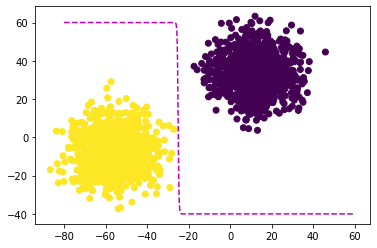

In [26]:
# Displaying data
plt.scatter(X[:,0], X[:,1], c=Y)

G = np.linspace(-80, 60, 10**3)
plt.plot(G ,-40 + 100*sigmoid(G*a_pred + b_pred)[0,:], '--m')

print(f"Accuracy = {accuracy:.2f}")